①データの読み込み・外観

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
matplotlib.style.use('ggplot')

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime
%matplotlib inline

In [46]:
df = pd.read_csv(r"C:\Users\yuka0\Documents\skillupai\ML\DAY1\homework\ks-projects-201801.csv")

In [47]:
df.shape

(378661, 15)

In [48]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)

usd pledged    3797
name              4
dtype: int64

In [49]:
df.describe(include=['O'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


In [50]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


②データの可視化

(1)state

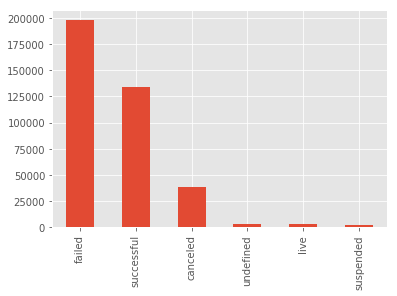

In [51]:
df["state"].value_counts().plot(kind = "bar")

In [52]:
#成功・失敗のほかにもいくつか種類がありそう→他の種類は一旦消すか。

(2)name

In [53]:
df["name"].value_counts().sort_values(ascending = False)

New EP/Music Development                                        41
Canceled (Canceled)                                             13
Music Video                                                     11
N/A (Canceled)                                                  11
New EP / Music Development                                      10
Debut Album                                                     10
Cancelled (Canceled)                                            10
Reflections                                                      9
The Journey                                                      9
Pizza                                                            8
The Other Side                                                   8
A Midsummer Night's Dream                                        8
The Awakening                                                    8
Choices                                                          7
Pasta Salad                                                   

In [54]:
#名前はあんまり関係なさそう

(3)category

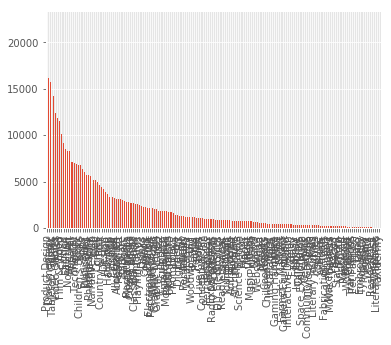

In [55]:
df["category"].value_counts().plot(kind ="bar")

In [56]:
#多すぎるので10000以上くらいに絞ってみる

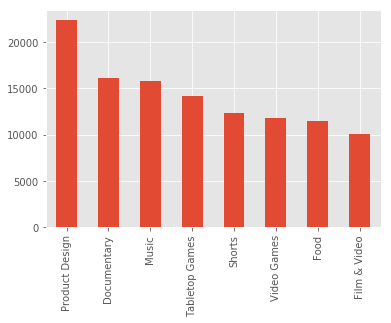

In [57]:
df["category"].value_counts()[df["category"].value_counts() > 10000].plot(kind="bar")
plt.show()

(4)maincategory

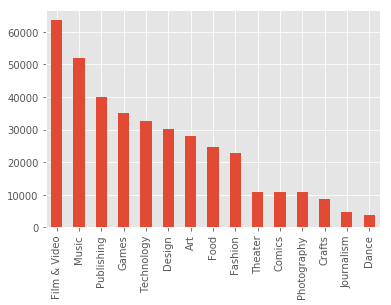

In [58]:
df["main_category"].value_counts().plot(kind = "bar")

In [59]:
#maincategoryの方が種類も少ないのでcategoryは使わなくてよさそう

(5)currency

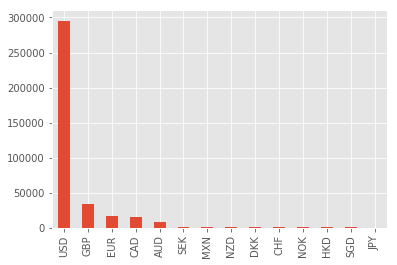

In [60]:
df["currency"].value_counts().plot(kind = "bar")

(6)募集期間

In [61]:
df['deadline'] = pd.to_datetime(df["deadline"])
df["launched"] = pd.to_datetime(df["launched"])

In [62]:
df["days"] = (df["deadline"] - df["launched"]).dt.days

In [63]:
df["days"].head()

0    58
1    59
2    44
3    29
4    55
Name: days, dtype: int64

(7)goal

(array([3.78507e+05, 4.40000e+01, 3.20000e+01, 1.40000e+01, 1.60000e+01,
        5.00000e+00, 1.00000e+00, 4.00000e+00, 0.00000e+00, 3.80000e+01]),
 array([1.e-02, 1.e+07, 2.e+07, 3.e+07, 4.e+07, 5.e+07, 6.e+07, 7.e+07,
        8.e+07, 9.e+07, 1.e+08]),
 <a list of 10 Patch objects>)

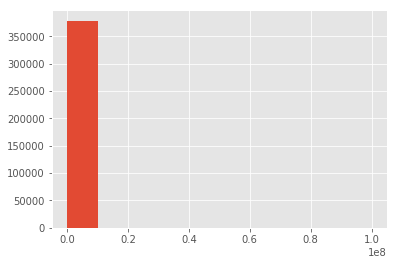

In [64]:
plt.hist(df["goal"])
#??

(8)country

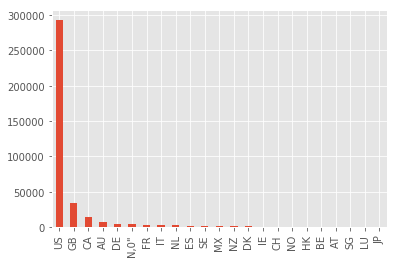

In [65]:
df["country"].value_counts().plot(kind= "bar")

③不要と思われるデータの削除

In [66]:
#stateが成功と失敗以外のデータを削除
#ID削除
#nameとcategoryも削除
#daysを募集期間で出したのでdf["deadline"]とdf["launched"]も削除
#backers,pledgedと、usd pledgedより右はモデルにいれちゃだめだと思うので削除

In [67]:
df = df[(df["state"] == "successful") | (df["state"] == "failed")]

In [68]:
df = df.drop(["ID","name","category","deadline","launched","backers","pledged","usd pledged","usd_pledged_real","usd_goal_real"], axis=1)

In [69]:
df.head()

,main_category,currency,goal,state,country,days
0,Publishing,GBP,1000.0,failed,GB,58
1,Film & Video,USD,30000.0,failed,US,59
2,Film & Video,USD,45000.0,failed,US,44
3,Music,USD,5000.0,failed,US,29
5,Food,USD,50000.0,successful,US,34


In [70]:
df.isnull().sum()

main_category    0
currency         0
goal             0
state            0
country          0
days             0
dtype: int64

In [77]:
df["state"] = df["state"].replace("failed",0)
df["state"] = df["state"].replace("successful",1)

④カテゴリ変数処理

In [78]:
df = pd.get_dummies(df, drop_first=True)

In [79]:
df.head()

,goal,state,days,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0,58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,0,59,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,0,44,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,0,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,1,34,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


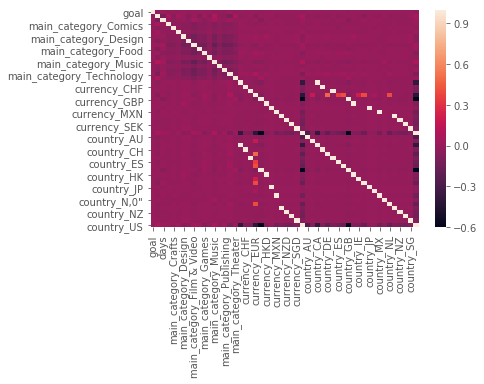

In [80]:
sns.heatmap(df.corr())
plt.show()

⑤ロジスティック回帰

In [82]:
y = df["state"].values
X = df.drop("state", axis=1).values

In [85]:
clf = SGDClassifier(loss = "log", penalty = "none", max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
# ラベルを予測
y_est = clf.predict(X)

In [88]:
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 =  失敗', '正解 =  成功'], 
                        columns=['予測 = 失敗', '予測 = 成功'])
conf_mat

,予測 = 失敗,予測 = 成功
正解 = 失敗,72579,125140
正解 = 成功,28139,105817


In [89]:
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

正答率 = 53.786%
